Itility Assignment Yiannis Makantasis

Questions:

• Can you analyze the measurement data and give advice on which IPC’s could be downsized?

• Describe the steps that you have taken to get to the advice (please mention which df you have included and why).

• Do a general check on the data and outline where you see strange activity (and why).

• What else would be needed to run such an analysis continuously across all IPCs?

In [1]:
# Import all the packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specify the path to the CSV file
csv_path_file = "C:/Users/User/Desktop/Itility Test Case/testcase_smart_applicator_v7.1_031022.csv"

# Read the CSV file uing a pandas DataFrame
df = pd.read_csv(csv_path_file, delimiter=";", decimal=",")

C:\Users\User\AppData\Local\Temp\ipykernel_15352\186018852.py:5: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path_file, delimiter=";", decimal=",")


In [ ]:
# Count the number of distinct values in the specified column
distinct_ipc_values = df['IPC'].nunique()

# Print the number of distinct values in the column
print("Number of distinct IPC values:", distinct_ipc_values)

In [3]:
# Print general information regarding the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440588 entries, 0 to 440587
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IPC           440588 non-null  object 
 1   Data Factory  440588 non-null  int64  
 2   time          440588 non-null  object 
 3   AvgValue      440588 non-null  float64
 4   MinValue      440588 non-null  float64
 5   MaxValue      440588 non-null  float64
 6   MetricId      440588 non-null  object 
 7   MemoryMB      440588 non-null  object 
 8   CpuMHz        440588 non-null  object 
 9   NumCpu        440588 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 33.6+ MB


In [4]:
# Print the first 5 rows of the DataFrame to get an idea of what the dataset looks like
df.head()

,IPC,Data Factory,time,AvgValue,MinValue,MaxValue,MetricId,MemoryMB,CpuMHz,NumCpu
0,ITLT4301,1,01/05/2021,9.764394e+05,53842.654540,3.235865e+06,MemActive,4096,0,0
1,ITLT4301,1,01/05/2021,9.894437e+01,29.343545,6.730676e+02,CpuUsageMHz,0,5600,2
2,ITLT4301,1,02/05/2021,1.068048e+06,66663.032840,3.238429e+06,MemActive,4096,0,0
3,ITLT4301,1,02/05/2021,1.146710e+02,30.260531,8.408760e+02,CpuUsageMHz,0,5600,2
4,ITLT4301,1,03/05/2021,9.245217e+05,56406.546800,3.371761e+06,MemActive,4096,0,0


In [ ]:
# Check if there are any duplicate entries
dup_rows = df[df.duplicated()]
print("The number of duplicated rows is", dup_rows)

In [5]:
# This cell willl first find the cells in CpuMHz that have two numbers inside the cell instead of one, and will remove them.
# The second step will be to turn the Dtype of this column from object to int-64 to be used for the later calculations

# Define a custom function to check for two values separated by a space
def has_two_values(cell):
    if isinstance(cell, str) and ' ' in cell:
        values = cell.split()
        if len(values) == 2 and all(value.isdigit() for value in values):
            return True
    return False

# Apply the custom function to the 'CPU' column
cpu_contains_two_values = df[df['CpuMHz'].apply(has_two_values)]

# Print the rows where 'CPU' contains two objects
print(cpu_contains_two_values)

df.drop(df.loc[df['CpuMHz'].str.contains(' ') == True].index, inplace=True)
df['CpuMHz'] = df['CpuMHz'].astype(np.int64)

             IPC  Data Factory        time     AvgValue    MinValue  \
110297  ITLT4027             2  01/05/2021   720.966879  533.589616   
110299  ITLT4027             2  02/05/2021   686.138319  580.777813   
110301  ITLT4027             2  03/05/2021  1739.929285  650.652643   
110303  ITLT4027             2  04/05/2021  2792.152463  676.969138   
110305  ITLT4027             2  05/05/2021   944.429642  677.876603   
...          ...           ...         ...          ...         ...   
423505  ITLT2490             5  18/05/2021   980.920656  848.019695   
423507  ITLT2490             5  19/05/2021   678.724984   40.587501   
423509  ITLT2490             5  20/05/2021   269.246435   32.815426   
423511  ITLT2490             5  21/05/2021   366.357965  296.202399   
423513  ITLT2490             5  22/05/2021   438.563616  306.565165   

           MaxValue     MetricId MemoryMB       CpuMHz NumCpu  
110297  2107.134502  CpuUsageMHz        0    2800 8380    1 4  
110299  2113.486760

In [ ]:
# Print the new general information to also check the changed Dtype of CpuMHz from onject to int-64
df.info()

In [6]:
# Similarly to CpuMHz, two numbers inside cells were found in the column MemoryMB. The 70 rows containing these cells are then removed
# The types of both MemoryMB and NumCpu are then alsso changed to int-64

# Define a custom function to check for two values separated by a space
def has_two_values(cell):
    if isinstance(cell, str) and ' ' in cell:
        values = cell.split()
        if len(values) == 2 and all(value.isdigit() for value in values):
            return True
    return False

# Apply the custom function to the 'CPU' column
memorymb_contains_two_values = df[df['MemoryMB'].apply(has_two_values)]

# Print the rows where 'CPU' contains two objects
print(memorymb_contains_two_values)

df.drop(df.loc[df['MemoryMB'].str.contains(' ') == True].index, inplace=True)
df['MemoryMB'] = df['MemoryMB'].astype(np.int64)
df['NumCpu'] = df['NumCpu'].astype(np.int64)

             IPC  Data Factory        time      AvgValue      MinValue  \
110296  ITLT4027             2  01/05/2021  2.132438e+06  1.461574e+06   
110298  ITLT4027             2  02/05/2021  2.097553e+06  1.420975e+06   
110300  ITLT4027             2  03/05/2021  2.324467e+06  1.238277e+06   
110302  ITLT4027             2  04/05/2021  2.342526e+06  1.552922e+06   
110304  ITLT4027             2  05/05/2021  2.022421e+06  1.461574e+06   
...          ...           ...         ...           ...           ...   
251244  ITLT2217             3  25/06/2021  6.278145e+05  8.338937e+04   
251246  ITLT2217             3  26/06/2021  6.307225e+05  8.338937e+04   
251248  ITLT2217             3  27/06/2021  3.482155e+05  8.338937e+04   
251250  ITLT2217             3  29/06/2021  3.499141e+05  8.338937e+04   
251252  ITLT2217             3  30/06/2021  4.900116e+05  8.338937e+04   

           MaxValue   MetricId    MemoryMB  CpuMHz NumCpu  
110296  3674236.385  MemActive  16384 4096       0 

In [7]:
# Print the new general information to also check the changed Dtype of MemoryMB and NumCpu from onject to int-64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440257 entries, 0 to 440587
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IPC           440257 non-null  object 
 1   Data Factory  440257 non-null  int64  
 2   time          440257 non-null  object 
 3   AvgValue      440257 non-null  float64
 4   MinValue      440257 non-null  float64
 5   MaxValue      440257 non-null  float64
 6   MetricId      440257 non-null  object 
 7   MemoryMB      440257 non-null  int64  
 8   CpuMHz        440257 non-null  int64  
 9   NumCpu        440257 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 36.9+ MB


In [8]:
# Filter the DataFrame to include only rows where the 'MetricId' column is 'MemActive', then calculate and display descriptive statistics

df.loc[(df['MetricId'] == 'MemActive')].describe()

,Data Factory,AvgValue,MinValue,MaxValue,MemoryMB,CpuMHz,NumCpu
count,220224.000000,2.202240e+05,2.202240e+05,2.202240e+05,2.202240e+05,220224.0,220224.0
mean,2.676879,1.293988e+06,6.557879e+05,3.416291e+06,2.860747e+04,0.0,0.0
std,1.302288,5.339458e+06,1.157657e+06,5.976122e+06,3.389848e+04,0.0,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.024000e+03,0.0,0.0
25%,2.000000,3.286998e+05,1.548708e+05,7.389318e+05,8.192000e+03,0.0,0.0
50%,3.000000,7.881258e+05,3.790278e+05,1.758828e+06,1.638400e+04,0.0,0.0
75%,4.000000,1.291920e+06,6.355409e+05,3.459513e+06,3.276800e+04,0.0,0.0
max,5.000000,2.323905e+09,3.055337e+07,4.256404e+08,1.035264e+06,0.0,0.0


In [9]:
# Filter the DataFrame to include only rows where the 'MetricId' column is 'CpuUsageMHz', then calculate and display descriptive statistics

df.loc[(df['MetricId'] == 'CpuUsageMHz')].describe()

,Data Factory,AvgValue,MinValue,MaxValue,MemoryMB,CpuMHz,NumCpu
count,220033.000000,220033.000000,220033.000000,2.200330e+05,220033.0,220033.000000,220033.000000
mean,2.676062,875.444347,592.020167,2.749286e+03,0.0,10145.052374,4.047157
std,1.302294,5870.090640,4501.420839,2.352219e+04,0.0,7181.357432,2.958206
min,1.000000,0.908054,0.000000,9.080540e-01,0.0,2095.000000,1.000000
25%,2.000000,76.675440,53.003218,2.127482e+02,0.0,5600.000000,2.000000
50%,3.000000,259.541226,176.159169,9.797195e+02,0.0,9600.000000,4.000000
75%,4.000000,623.116686,389.669562,2.302708e+03,0.0,11200.000000,4.000000
max,5.000000,349703.589500,237677.962200,1.802968e+06,0.0,76800.000000,32.000000


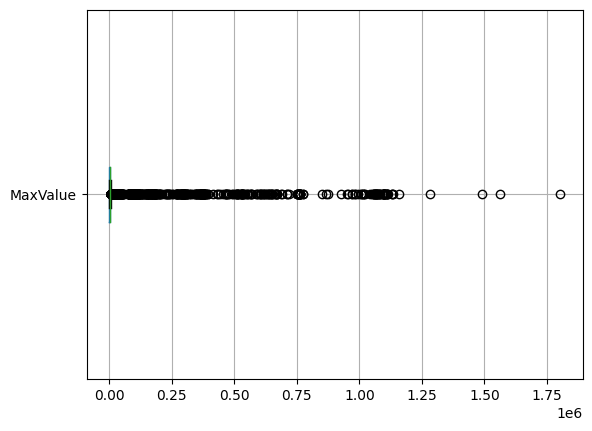

In [10]:
boxplot = df.loc[(df['MetricId'] == 'CpuUsageMHz')].boxplot(column=['MaxValue'], vert=False)

In [ ]:
sns.countplot(x = df.loc[(df['AvgValue'] > 0.8 * df['CpuMHz']) & (df['MetricId'] == 'CpuUsageMHz')].groupby(['IPC']).size())
plt.xlabel("Number of times upper limit has been surpassed", size = 14, labelpad=14)
plt.ylabel("Number of IPC's", size=14, labelpad=14)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=13)

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

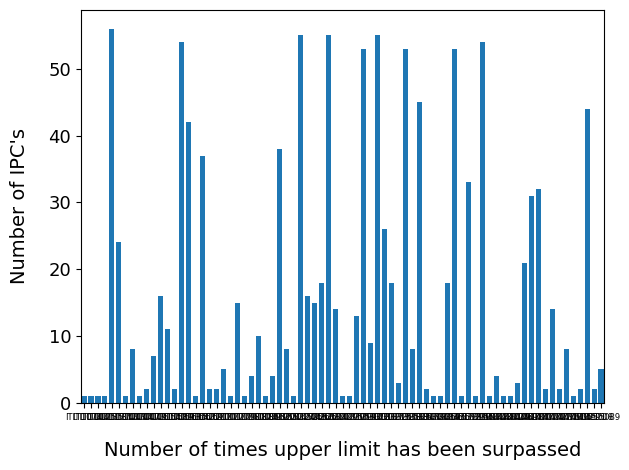

In [11]:
filtered_data = df.loc[(df['AvgValue'] > 0.8 * df['CpuMHz']) & (df['MetricId'] == 'CpuUsageMHz')].groupby(['IPC']).size()

plt.bar(filtered_data.index, filtered_data.values)
plt.xlabel("Number of times upper limit has been surpassed", size=14, labelpad=14)
plt.ylabel("Number of IPC's", size=14, labelpad=14)
plt.xticks(fontsize=6)
plt.yticks(fontsize=13)
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()
plt.show()

In [13]:
# Create a new DataFrame cpuData containing only the rows where the 'MetricId' column is 'CpuUsageMHz'

cpuData = df.loc[(df['MetricId'] == 'CpuUsageMHz' )].copy()
cpuData.head()

,IPC,Data Factory,time,AvgValue,MinValue,MaxValue,MetricId,MemoryMB,CpuMHz,NumCpu
1,ITLT4301,1,01/05/2021,98.944375,29.343545,673.067569,CpuUsageMHz,0,5600,2
3,ITLT4301,1,02/05/2021,114.670983,30.260531,840.875968,CpuUsageMHz,0,5600,2
5,ITLT4301,1,03/05/2021,121.061228,32.094503,906.898945,CpuUsageMHz,0,5600,2
7,ITLT4301,1,04/05/2021,119.882602,33.928474,690.490299,CpuUsageMHz,0,5600,2
9,ITLT4301,1,05/05/2021,125.255574,35.762446,728.086716,CpuUsageMHz,0,5600,2


In [ ]:
# Not used in the end

count_low_utilization = 0

for index, row in cpuData.iterrows():
    max_possible_cpu_utilization = row['NumCpu'] * row['CpuMHz']
    actual_cpu_utilization = (row['MaxValue'] / max_possible_cpu_utilization) * 100
    
    if actual_cpu_utilization < 30:
        count_low_utilization += 1  # Increment the counter
    
print(f"Number of IPCs with actual CPU utilization less than 30%: {count_low_utilization}")

In [14]:
# Add a new columnd "Oversized", indicating if a CPU is oversized or not.

cpuData['Oversized'] = 0
cpuData.loc[cpuData.MaxValue <= 0.3 * cpuData.CpuMHz ,'Oversized']= 1

In [15]:
# Process the cpuData DataFrame to calculate the count and sum of 'Oversized' values for each 'IPC' group. 
# Then create a new column 'RecommendForDownsize' and set its values to 1 for rows where the 'IPC' matches the number of oversized instances. The resulting DataFrame displays this information.


Oversized = cpuData.groupby(['IPC']).agg({'Oversized': ['count', 'sum']})
Oversized.columns = ['IPC', 'Oversized']
Oversized['RecommendForDownsize'] = 0
Oversized.loc[Oversized.IPC == Oversized.Oversized, 'RecommendForDownsize'] = 1
Oversized

,IPC,Oversized,RecommendForDownsize
IPC,,,
ITLT1000,55,49,0
ITLT1001,53,34,0
ITLT1002,54,0,0
ITLT1003,53,53,1
ITLT1004,59,59,1
...,...,...,...
ITLT5260,55,55,1
ITLT5261,54,54,1
ITLT5262,54,15,0


In [ ]:
# Export the resulting DataFrame into a CSV file, named RecommendedForDownSize.csv for a detaield list of all IPCs that can be downsized

Oversized['RecommendForDownsize'].to_csv('C:/Users/User/Desktop/Itility Test Case/RecommendForDownsize.csv')